
Analysis for n = 100


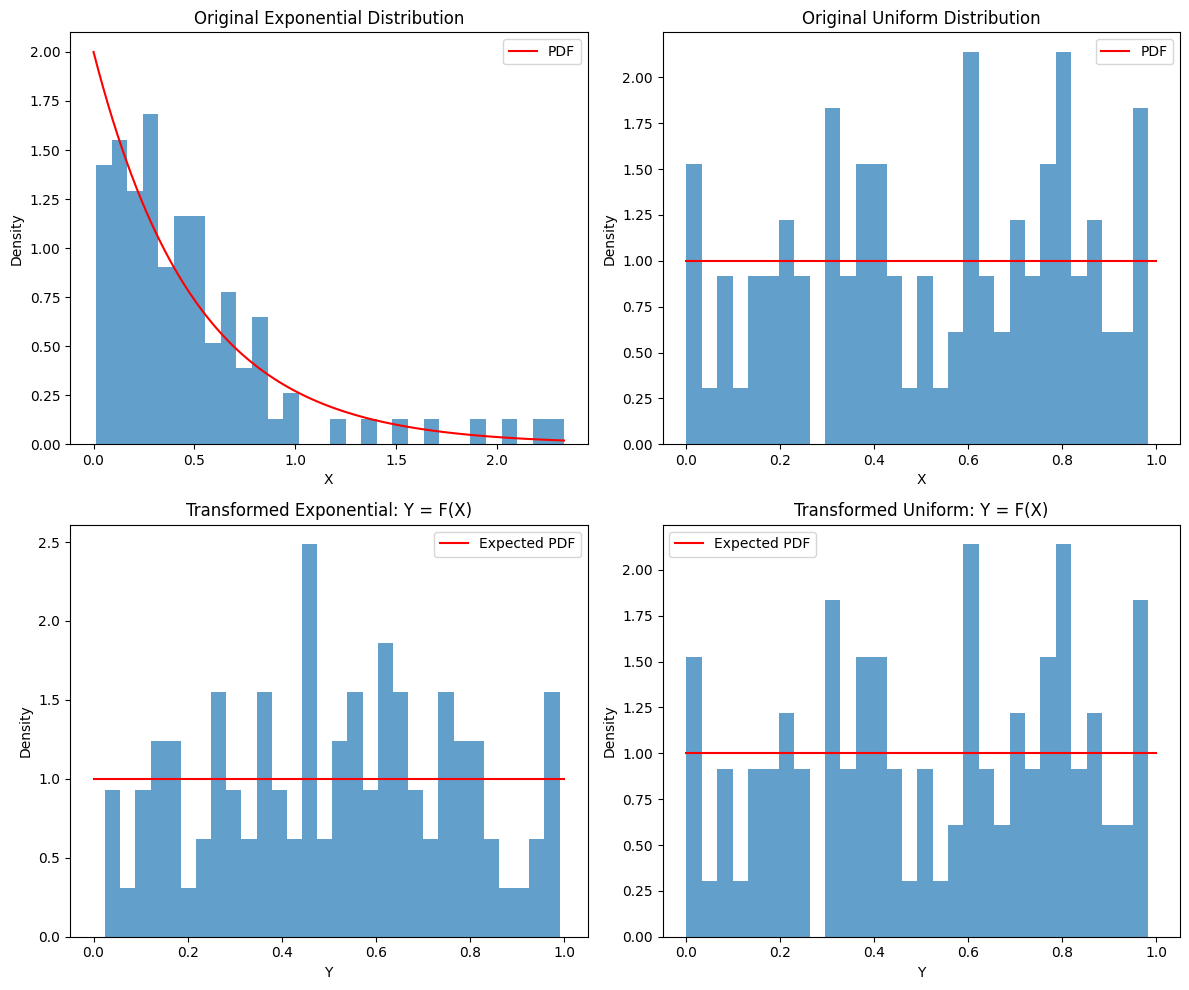


Analysis for n = 1000


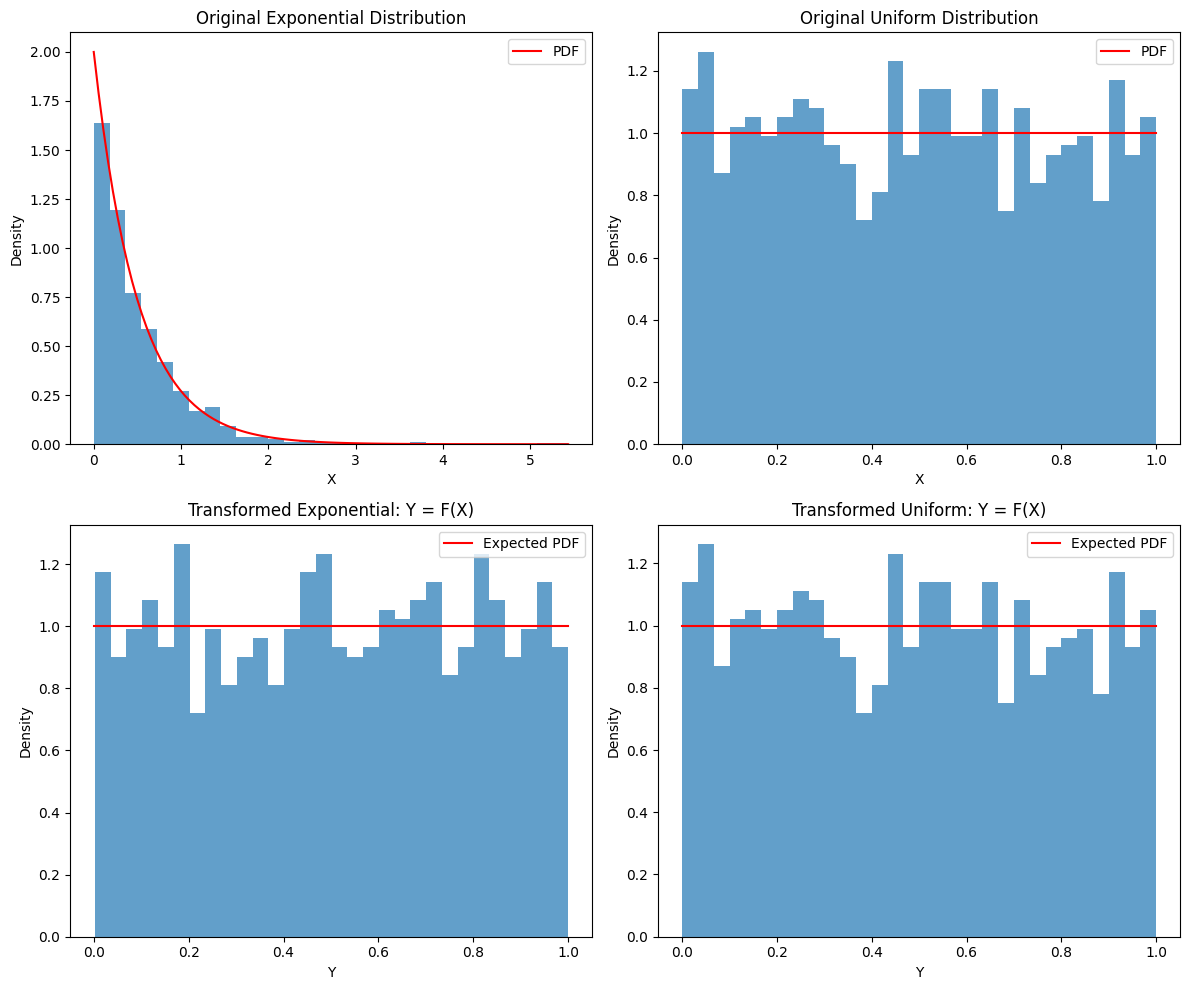


Analysis for n = 10000


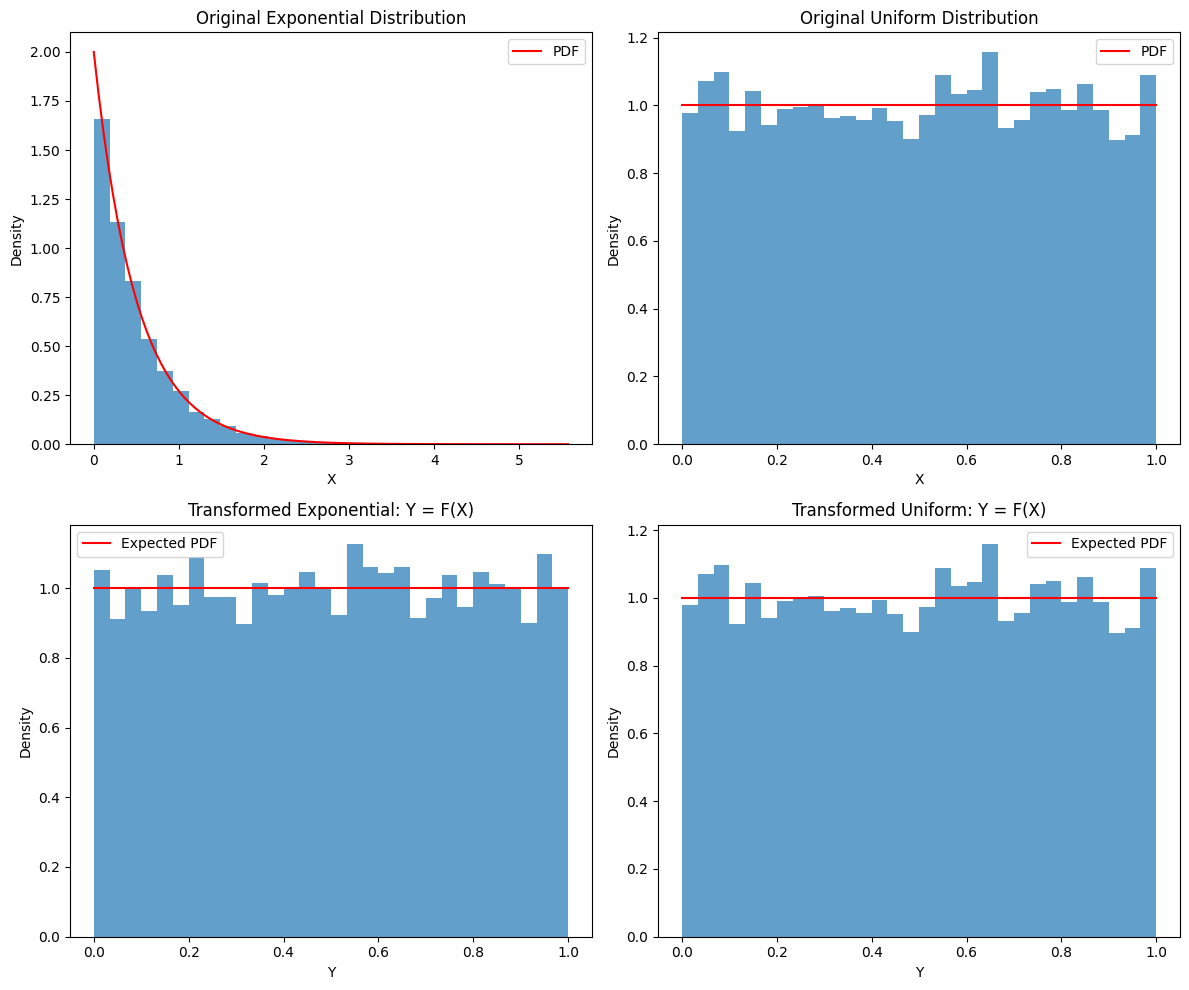


Analysis for n = 100000


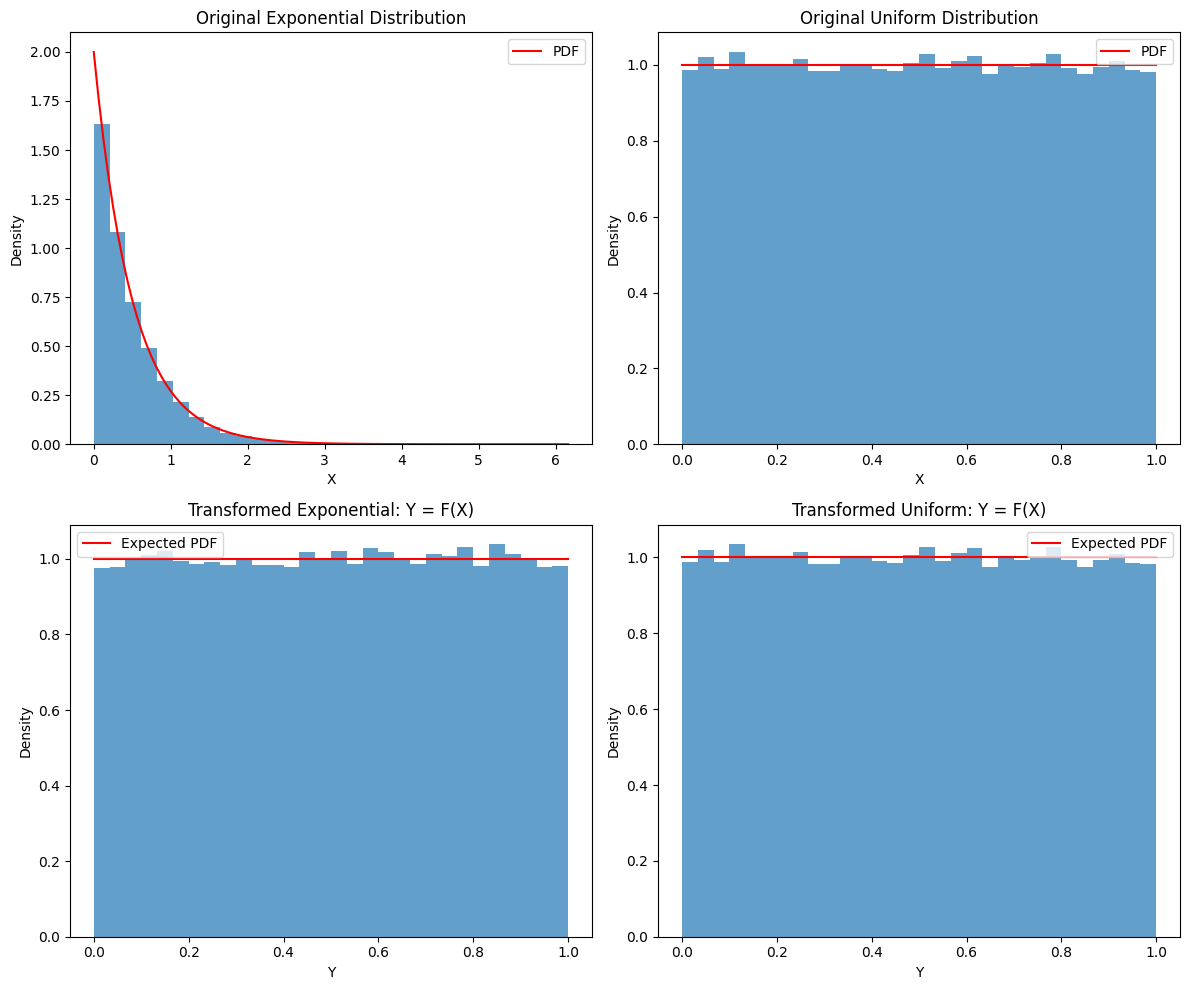


Analysis for n = 1000000


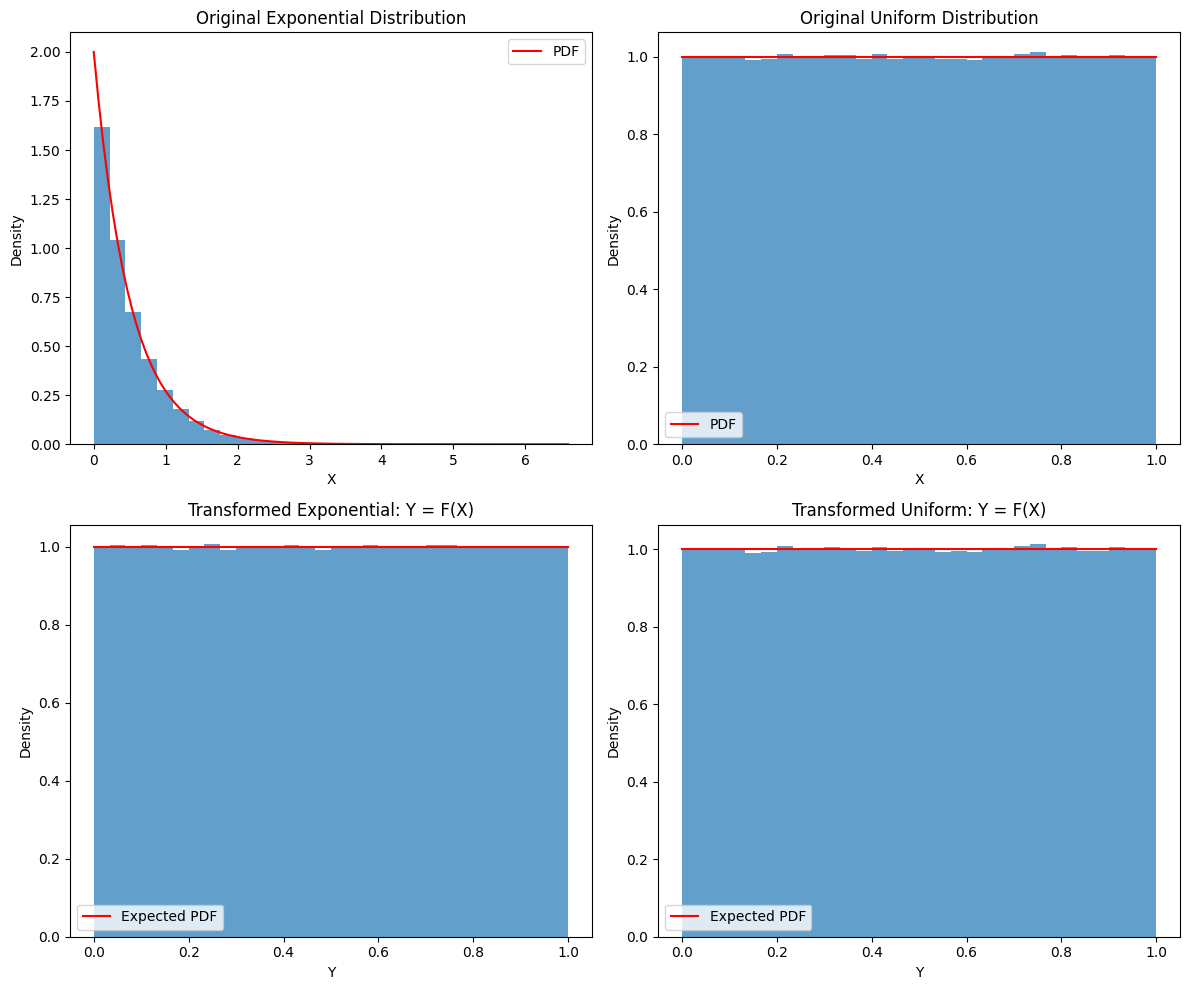

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def generate_and_analyze(n):
    exp_numbers = np.random.exponential(scale=1/2, size=n)
    uniform_numbers = np.random.uniform(0, 1, size=n)

    y_exp = 1 - np.exp(-2 * exp_numbers)
    y_uniform = uniform_numbers

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

    ax1.hist(exp_numbers, bins=30, density=True, alpha=0.7)
    ax1.set_title('Original Exponential Distribution')
    x = np.linspace(0, max(exp_numbers), 100)
    ax1.plot(x, 2 * np.exp(-2 * x), 'r-', label='PDF')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Density')
    ax1.legend()

    ax2.hist(uniform_numbers, bins=30, density=True, alpha=0.7)
    ax2.plot([0, 1], [1, 1], 'r-', label='PDF')
    ax2.set_title('Original Uniform Distribution')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Density')
    ax2.legend()


    ax3.hist(y_exp, bins=30, density=True, alpha=0.7)
    ax3.plot([0, 1], [1, 1], 'r-', label='Expected PDF')
    ax3.set_title('Transformed Exponential: Y = F(X)')
    ax3.set_xlabel('Y')
    ax3.set_ylabel('Density')
    ax3.legend()

    ax4.hist(y_uniform, bins=30, density=True, alpha=0.7)
    ax4.plot([0, 1], [1, 1], 'r-', label='Expected PDF')
    ax4.set_title('Transformed Uniform: Y = F(X)')
    ax4.set_xlabel('Y')
    ax4.set_ylabel('Density')
    ax4.legend()

    plt.tight_layout()
    plt.show()

    return y_exp, y_uniform
n_values = [100, 1000, 10000, 100000, 1000000]
for n in n_values:
    print(f"\nAnalysis for n = {n}")
    y_exp, y_uniform = generate_and_analyze(n)

<ipython-input-6-5f8106bd9f31>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(words_list, rotation=45, ha='right')


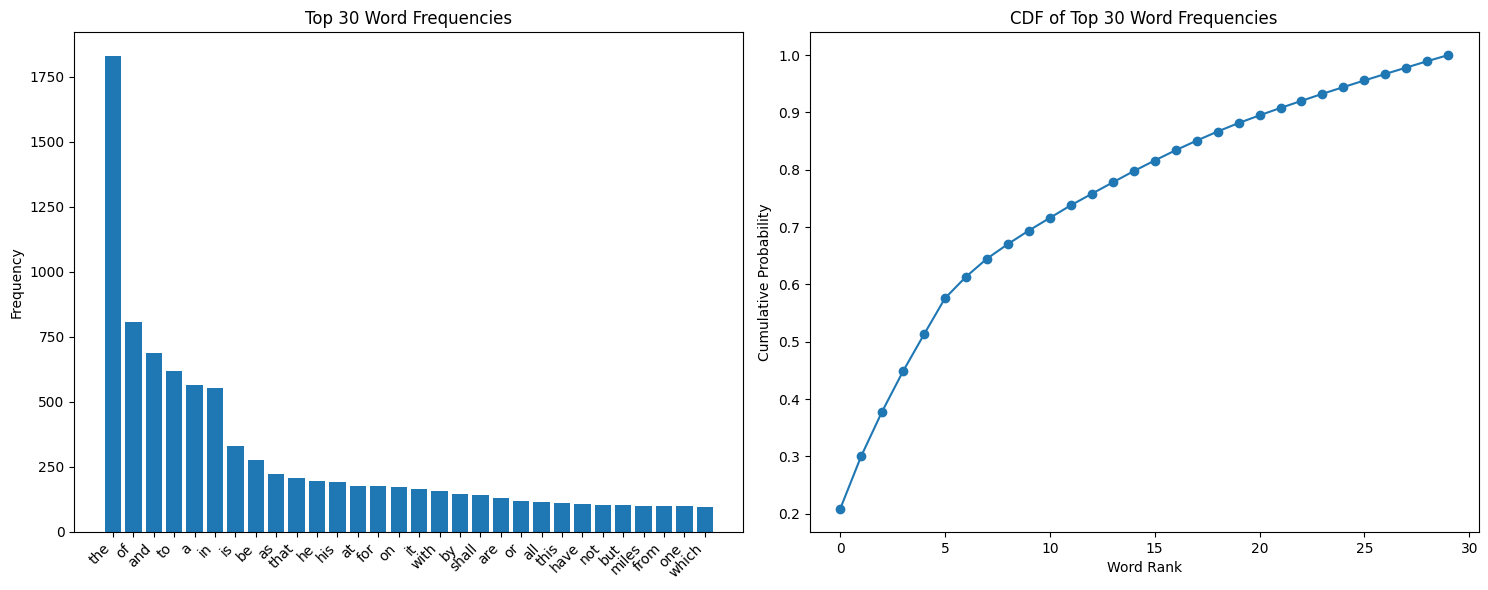


Top 30 words and their transformed frequencies:
the:	Original freq = 1830,	Transformed = 0.208
of:	Original freq = 809,	Transformed = 0.300
and:	Original freq = 687,	Transformed = 0.378
to:	Original freq = 619,	Transformed = 0.448
a:	Original freq = 566,	Transformed = 0.513
in:	Original freq = 555,	Transformed = 0.576
is:	Original freq = 330,	Transformed = 0.613
be:	Original freq = 278,	Transformed = 0.645
as:	Original freq = 224,	Transformed = 0.670
that:	Original freq = 208,	Transformed = 0.694
he:	Original freq = 194,	Transformed = 0.716
his:	Original freq = 193,	Transformed = 0.738
at:	Original freq = 177,	Transformed = 0.758
for:	Original freq = 175,	Transformed = 0.778
on:	Original freq = 173,	Transformed = 0.797
it:	Original freq = 163,	Transformed = 0.816
with:	Original freq = 158,	Transformed = 0.834
by:	Original freq = 147,	Transformed = 0.851
shall:	Original freq = 140,	Transformed = 0.867
are:	Original freq = 130,	Transformed = 0.881
or:	Original freq = 118,	Transformed = 

In [ ]:
import requests
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_text_data(url):
    response = requests.get(url)
    return response.text if response.status_code == 200 else None

def process_text(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return words

def analyze_word_frequencies(words):
    word_counts = Counter(words)

    top_30 = dict(word_counts.most_common(30))

    frequencies = np.array(list(top_30.values()))
    total_freq = frequencies.sum()
    cdf = np.cumsum(frequencies) / total_freq

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    words_list = list(top_30.keys())
    ax1.bar(words_list, frequencies)
    ax1.set_title('Top 30 Word Frequencies')
    ax1.set_xticklabels(words_list, rotation=45, ha='right')
    ax1.set_ylabel('Frequency')

    ax2.plot(range(len(cdf)), cdf, marker='o')
    ax2.set_title('CDF of Top 30 Word Frequencies')
    ax2.set_xlabel('Word Rank')
    ax2.set_ylabel('Cumulative Probability')

    plt.tight_layout()
    plt.show()

    return top_30, cdf

url = 'https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL253/assignment_2/text_file.txt'
text = get_text_data(url)

if text:
    words = process_text(text)
    top_30, cdf = analyze_word_frequencies(words)

    print("\nTop 30 words and their transformed frequencies:")
    for (word, freq), cdf_val in zip(top_30.items(), cdf):
        print(f"{word}:\tOriginal freq = {freq},\tTransformed = {cdf_val:.3f}")

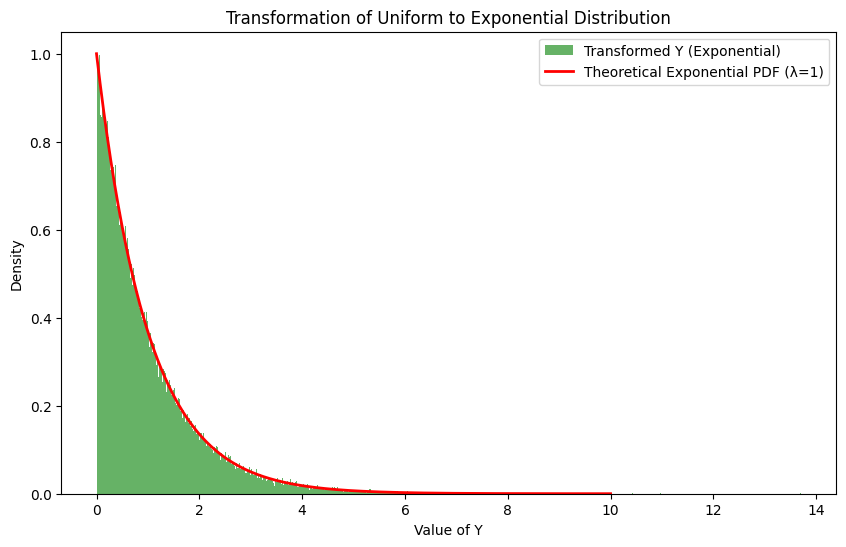

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lambda_value = 1
num_samples = 100000

U = np.random.uniform(0, 1, num_samples)

Y = -np.log(1 - U) / lambda_value

plt.figure(figsize=(10, 6))

plt.hist(Y, bins=1000, density=True, alpha=0.6, color='g', label='Transformed Y (Exponential)')

x = np.linspace(0, 10, 1000)
pdf_theoretical = lambda_value * np.exp(-lambda_value * x)
plt.plot(x, pdf_theoretical, 'r-', lw=2, label=f'Theoretical Exponential PDF (λ={lambda_value})')

plt.title('Transformation of Uniform to Exponential Distribution')
plt.xlabel('Value of Y')
plt.ylabel('Density')
plt.legend()

plt.show()

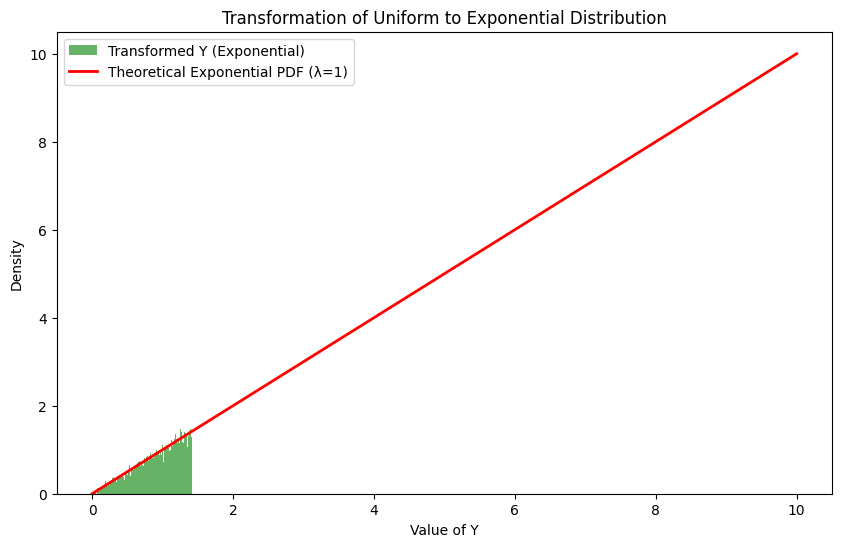

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 100000

U = np.random.uniform(0, 1, num_samples)

Y = np.sqrt(2*U)

plt.figure(figsize=(10, 6))

plt.hist(Y, bins=1000, density=True, alpha=0.6, color='g', label='Transformed Y (Exponential)')

x = np.linspace(0, 10, 1000)
pdf_theoretical = x
plt.plot(x, pdf_theoretical, 'r-', lw=2, label=f'Theoretical Exponential PDF (λ={lambda_value})')

plt.title('Transformation of Uniform to Exponential Distribution')
plt.xlabel('Value of Y')
plt.ylabel('Density')
plt.legend()

plt.show()